In [0]:
print("Hi")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 500575.csv to 500575.csv


In [0]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['500575.csv']))

In [32]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 13 columns):
Date                         989 non-null datetime64[ns]
Open Price                   989 non-null float64
High Price                   989 non-null float64
Low Price                    989 non-null float64
Close Price                  989 non-null float64
WAP                          989 non-null float64
No.of Shares                 989 non-null int64
No. of Trades                989 non-null int64
Total Turnover (Rs.)         989 non-null float64
Deliverable Quantity         988 non-null float64
% Deli. Qty to Traded Qty    988 non-null float64
Spread High-Low              989 non-null float64
Spread Close-Open            989 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 100.5 KB


In [0]:
sort_data = data.sort_values(['Date'],ascending=[True])

In [0]:
stock_data = sort_data['Close Price'].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data.reshape(-1,1))

In [52]:
scaled_data

array([[-8.03729570e-01],
       [-8.79168180e-01],
       [-9.05340759e-01],
       [-8.98797614e-01],
       [-8.98027832e-01],
       [-8.44528002e-01],
       [-8.24128786e-01],
       [-8.48761802e-01],
       [-7.30600306e-01],
       [-6.88262311e-01],
       [-8.37599966e-01],
       [-8.40679093e-01],
       [-8.41063984e-01],
       [-9.07265213e-01],
       [-1.02311736e+00],
       [-9.66538406e-01],
       [-9.76160678e-01],
       [-1.00310304e+00],
       [-9.65768624e-01],
       [-9.86552731e-01],
       [-9.82318932e-01],
       [-9.84628277e-01],
       [-1.04043745e+00],
       [-1.05775754e+00],
       [-1.03427920e+00],
       [-1.04736549e+00],
       [-1.02311736e+00],
       [-1.02696627e+00],
       [-1.03312453e+00],
       [-1.06199134e+00],
       [-1.06968916e+00],
       [-1.01849867e+00],
       [-1.00618217e+00],
       [-1.10125021e+00],
       [-1.08277545e+00],
       [-1.04351658e+00],
       [-1.03543387e+00],
       [-1.00002391e+00],
       [-9.9

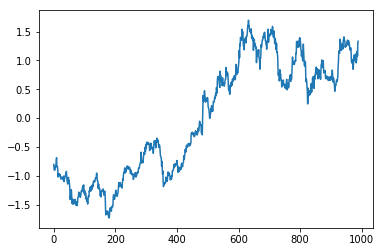

In [43]:
import matplotlib.pyplot as plt
plt.plot(scaled_data)

In [0]:
def window_data(data,window_size):
  X = []
  y = []
  
  i=0
  while (i + window_size) <= len(data)-1:
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
    
    i+=1
    
  assert len(X) == len(y)
  return X,y
    

In [0]:
X,y = window_data(scaled_data,7)

In [55]:
len(X[0])

7

In [0]:
import numpy as np
X_train = np.array(X[:687])
y_train = np.array(y[:687])
X_test = np.array(X[687:])
y_test = np.array(y[687:])

In [72]:
X_train.shape[1]

7

In [0]:
#parameters used in the network
batch_size = 7
window_size = 7
hidden_layer = 256
clip_margin = 4
learning_rate = 0.001
epochs = 200

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, LSTM

In [0]:
input = tf.placeholder(tf.float32,[batch_size,window_size,1])
target = tf.placeholder(tf.float32,[batch_size,1])

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=hidden_layer, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(units=hidden_layer))
model.add(Dense(1))

optimizer = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

In [0]:
pred_scaled_closing_price = model.predict(X_test)

In [0]:
pred_closing_price = scaler.inverse_transform(pred_scaled_closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


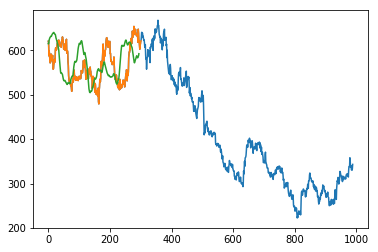

In [112]:
price_data = sort_data['Close Price'].to_frame()
train = price_data[:687]
valid = price_data[687:]
close_price = pd.DataFrame(pred_closing_price,columns=['prediction'])
valid['prediction'] = close_price['prediction']
plt.plot(sort_data['Close Price'])
plt.plot(valid[['Close Price','prediction']])